In [38]:
from utils import * 
from scipy.stats import lognorm, gmean, beta

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
# (R/L )* exp(μL + ½ 𝜎L2) * exp(μx + ½ 𝜎x2) = C

# def get_expected_coverage(mu_L:float, sigma_L:float, sigma_x:float, mu_x:float, R:int, L:int):
#     # This expects the values transformed back to the underlying normal. 
#     mu_L, sigma_L, mu_x, sigma_x = np.log(mu_L), np.log(sigma_L), np.log(mu_x), np.log(sigma_x)
#     return (R / L) * np.exp(mu_L + 0.5 * sigma_L**2) * np.exp(mu_x + 0.5 * sigma_x**2)

def get_expected_coverage(mu:float, sigma:float, alpha:float, beta:float, R:int, L:int):
    # This expects the values transformed back to the underlying normal. 
    mu, sigma = np.log(mu), np.log(sigma)
    return (R / L) * np.exp(mu + 0.5 * sigma**2) * (alpha / (alpha + beta))


In [3]:
metat_df = metat_load()
metat_df = metat_df[metat_df.reactor == 'n'].copy()

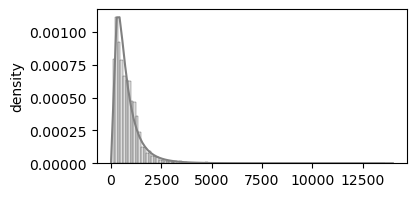

Mean length: 636.457464131163


In [52]:
genome_id = 'mp_18'
sample_id = 'n_top_2024_metat'
# Genome size, specifically of the CDS regions. 
gene_lengths = metat_df[(metat_df.genome_id == genome_id)].drop_duplicates('gene_id').length.values

# loc converts to a shifted log normal distribution, which is not necessary. 
sigma, _, mu = lognorm.fit(gene_lengths, floc=0) # What does fixing the loc at zero do?
 
# logNormal is X~exp(Y) where Y~N(mu, sigma), so log(X)~Y and mu = E[log(X)] 
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(gene_lengths, stat='density', color='lightgray')

x = np.linspace(1e-1, 14000, 100)
y = lognorm.pdf(x, s=sigma, scale=mu)
sns.lineplot(x=x, y=y, color='gray')
ax.set_ylabel('density')
plt.show()

print('Mean length:', np.exp(np.log(mu) + 0.5 * np.log(sigma)**2))

In [67]:
L = sum(gene_lengths)
# R = metat_df[metat_df.sample_id == sample_id].library_size.iloc[0]

activities = metat_df[(metat_df.genome_id == genome_id) & (metat_df.sample_id == sample_id)].read_count.values 
R = metat_df[(metat_df.genome_id == genome_id) & (metat_df.sample_id == sample_id)].read_count.sum() # Total reads mapped to organism in sample. 
C = metat_df[(metat_df.genome_id == genome_id) & (metat_df.sample_id == sample_id) & (metat_df.read_count > 0)].gene_id.nunique() / len(activities)
print(f'Observed coverage: {C * 100:.2f}%') 

# activities = np.where(activities == 0, 1, activities)
activities = activities / activities.sum() # Normalize to sum to zero. 
alpha = 1

Observed coverage: 50.88%


In [73]:
get_expected_coverage(mu, sigma, alpha, 10, R, L)

np.float64(0.426314014852019)

In [72]:
activities / activities.sum()

array([0.        , 0.00024207, 0.00012104, ..., 0.00036311, 0.        ,
       0.        ], shape=(2795,))

In [16]:
mu_x

np.float64(6.09209182433514e+195)